###    Here we will perform classification task on very popular dataset Iris. We have three categories namely -
      Setosa, Versicolor and Virginica

###    There are certain attributes provided which we will use to perform our classification
    Sepal Length
    Sepal Width
    Petal Length
    Petal Width

## Importing Libraries

In [11]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Decision tree and visualization
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

# statistics
import scipy.stats as stats
# other options
plt.style.use('seaborn')

## Reading the Dataset

In [3]:
iris = pd.read_csv('Iris.csv')
iris.drop(columns=['Id'], axis = 1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


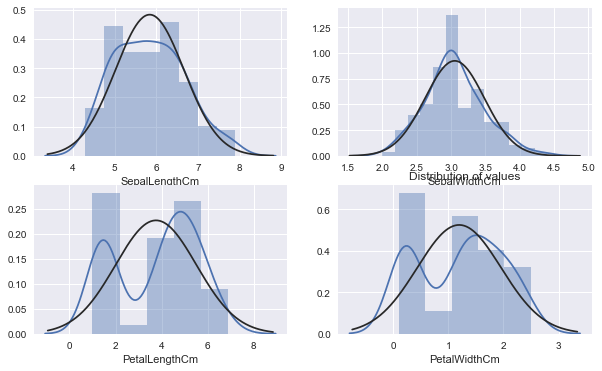

In [20]:
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax = ax.flatten()
for i in range(len(cols)):
    sns.distplot(iris[cols[i]], fit = stats.norm, ax = ax[i])
plt.title("Distribution of values")
plt.show()

### Check the class distribution for categories

In [125]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Box plot of variables with respect to each class

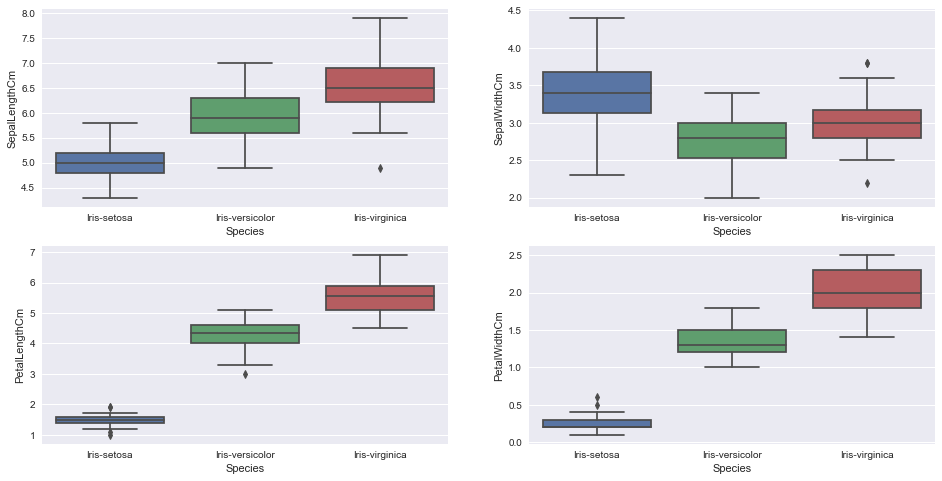

In [126]:
fig, ax = plt.subplots(2,2, figsize=(16,8))
sns.boxplot('Species', 'SepalLengthCm', data = iris, ax = ax[0,0])
sns.boxplot('Species', 'SepalWidthCm', data = iris, ax = ax[0,1])
sns.boxplot('Species', 'PetalLengthCm', data = iris, ax = ax[1,0])
sns.boxplot('Species', 'PetalWidthCm', data = iris, ax = ax[1,1])
plt.show()

### Pairplot for the variables and hue = 'Species' for visualization of points w.r.t each class

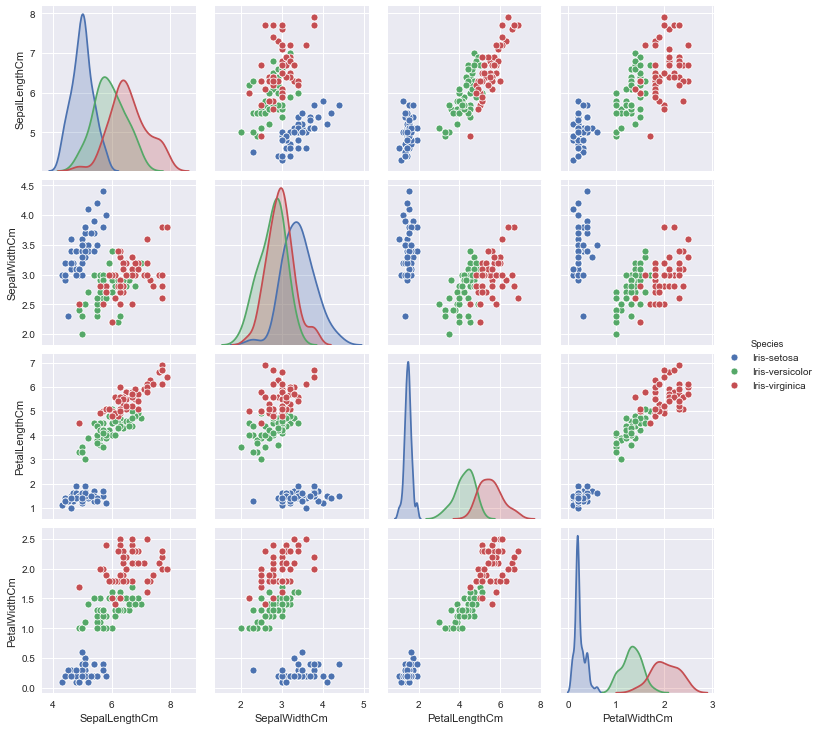

In [127]:
sns.pairplot(iris, hue='Species')
plt.show()

### It is easily visualized that for Setosa the attributes are quite clear and will be easily classified. However for Virigina and Versicolor there is a mingling of data which might lead to some misclassification

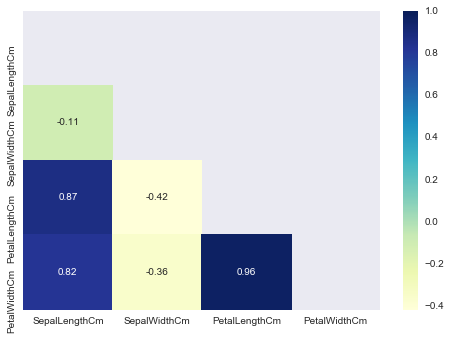

In [128]:
corr = iris.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu')
plt.show()

### Correlation Plot
    the sepal length and petal width have high positive correlation
    the sepal length and petal length have high positive correlation
    the petal length and petal width have high positive correlation
    the sepal width is negatively correlated to the Petal length and width

### Going Forward to Build the model for classification

    To check how our model performs and identify the problem of overfit, one of the most well known techniques is 
    splitting our data into train and test (but its not the best method, cross validation is better but we leave this for 
    another tutorial)
    Further we evaluate our model based on certain metrics such as roc auc score

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#### Note: Also notice that we don't need to perform scaling on data as all predictors are on a similar scale (in cms.)

#### Also before making the data split we map the classes to certain values as ML models only work on numerical data

In [37]:
X = iris.drop('Species', axis=1)
Y = iris['Species'].map({'Iris-virginica':0, 'Iris-versicolor':1, 'Iris-setosa':2})

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7, random_state=1)

### Building the Model

In [25]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [36]:
trainpred = dtree.predict(xtrain) 
testpred = dtree.predict(xtest)

trainpred_prob = dtree.predict_proba(xtrain)
testpred_prob = dtree.predict_proba(xtest)
print("ROC AUC Score for Train and Test\n")
print("Auc Score on train : %.2f"%roc_auc_score(ytrain, trainpred_prob, multi_class='ovr'))
print("Auc Score on test : %.2f"%roc_auc_score(ytest, testpred_prob, multi_class='ovr'))

print("\nClassification report for Train and Test")
print(classification_report(ytrain, trainpred))
print()
print(classification_report(ytest, testpred))

ROC AUC Score for Train and Test

Auc Score on train : 1.00
Auc Score on test : 0.97

Classification report for Train and Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        18
           2       1.00      1.00      1.00        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#### ROC AUC is a metric independent of the threshold values hence is widely used in classification model evaluations
#### One can also look at F1-score which is a better metric for checking model performance as its a combination of both precision and recall and indicates how well our model performs in classifying rather than just looking at one

## Decision Tree Visualization

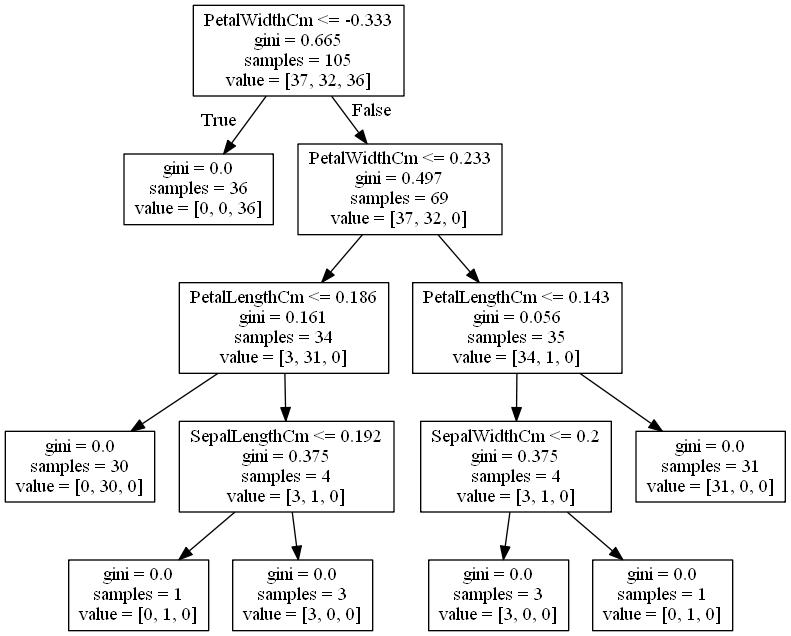

In [133]:
dot_data = export_graphviz(dtree, feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Note : Decision Trees are not the best at learning patterns when the data becomes complex, hence we use advanced algorithms such as Random Forest which builds multiple trees and finds which variables are important